In [1]:
%pip install plotly
%pip install geopandas matplotlib
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime


# Uncover What's Hot in Online Shopping: A Data-Driven Adventure

**Hey there! Curious about what makes online shoppers tick? This notebook dives into a pile of online shopping data to reveal hidden trends and pattern.**

**We'll uncover:**

* The most popular products: What's flying off the digital shelves?
* When people shop: Are there certain times or months when sales go crazy?
* Where shoppers come from: Which countries are the biggest online spenders?
* Who the most loyal customers are: Who keeps coming back for more?

**Get ready to:**

* See cool charts and graphs that show shopping patterns in a whole new light.
* Learn how to use data to understand what customers want.
* Discover ways to make online stores even better.
* Share your ideas with other Kaggle members and see what they think!

**Whether you're a pro at data or just starting out, come explore the world of online shopping with us!**

In [3]:
df=pd.read_csv('online_retail.csv')
df

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
541904,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


In [5]:
df.describe()

,index,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,541909.000000,406829.000000
mean,270954.000000,9.552250,4.611114,15287.690570
std,156435.797851,218.081158,96.759853,1713.600303
min,0.000000,-80995.000000,-11062.060000,12346.000000
25%,135477.000000,1.000000,1.250000,13953.000000
50%,270954.000000,3.000000,2.080000,15152.000000
75%,406431.000000,10.000000,4.130000,16791.000000
max,541908.000000,80995.000000,38970.000000,18287.000000


In [6]:
df.isna().sum()

index               0
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

#### There are lots of missing values in Customer ID 

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.drop(columns=['index'],inplace=True)

In [9]:
len(df['Description'].unique())

4224

#### There are 4224 unique products in our data

## Most buyed Product Analysis

In [10]:
Most_buyed_product=df.groupby(by='Description').agg({'Quantity':'sum'}).sort_values(by='Quantity',ascending=False).reset_index().head(15)
Most_buyed_product

,Description,Quantity
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
1,JUMBO BAG RED RETROSPOT,47363
2,ASSORTED COLOUR BIRD ORNAMENT,36381
3,POPCORN HOLDER,36334
4,PACK OF 72 RETROSPOT CAKE CASES,36039
5,WHITE HANGING HEART T-LIGHT HOLDER,35317
6,RABBIT NIGHT LIGHT,30680
7,MINI PAINT SET VINTAGE,26437
8,PACK OF 12 LONDON TISSUES,26315
9,PACK OF 60 PINK PAISLEY CAKE CASES,24753


In [11]:
fig=px.bar(Most_buyed_product,x='Quantity',y='Description',title='Top 15 Most Buyed Product')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

## Top Products Countrywise

In [ ]:
top_products_countrywise=df.groupby(['Country','Description']).agg({'Quantity':'sum'}).reset_index()
top_products_countrywise

,Country,Description,Quantity
0,Australia,DOLLY GIRL BEAKER,200
1,Australia,I LOVE LONDON MINI BACKPACK,4
2,Australia,10 COLOUR SPACEBOY PEN,48
3,Australia,12 PENCIL SMALL TUBE WOODLAND,384
4,Australia,12 PENCILS TALL TUBE POSY,252
...,...,...,...
20171,Unspecified,WRAP POPPIES DESIGN,25
20172,Unspecified,WRAP SUKI AND FRIENDS,25
20173,Unspecified,WRAP VINTAGE PETALS DESIGN,25
20174,Unspecified,WRAP WEDDING DAY,25


In [ ]:
countries=list(df['Country'].unique())
countries

['United Kingdom',
 'France',
 'Australia',
 'Netherlands',
 'Germany',
 'Norway',
 'EIRE',
 'Switzerland',
 'Spain',
 'Poland',
 'Portugal',
 'Italy',
 'Belgium',
 'Lithuania',
 'Japan',
 'Iceland',
 'Channel Islands',
 'Denmark',
 'Cyprus',
 'Sweden',
 'Austria',
 'Israel',
 'Finland',
 'Bahrain',
 'Greece',
 'Hong Kong',
 'Singapore',
 'Lebanon',
 'United Arab Emirates',
 'Saudi Arabia',
 'Czech Republic',
 'Canada',
 'Unspecified',
 'Brazil',
 'USA',
 'European Community',
 'Malta',
 'RSA']

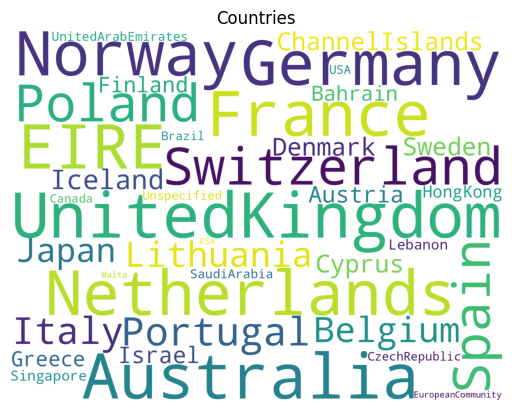

In [ ]:
text=[]
for i in countries:
    i=i.replace(' ','')
    text.append(i)
text=','.join(text)
wordcloud=WordCloud(width=1600,height=1200 , background_color='white').generate(text)
plt.title('Countries')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

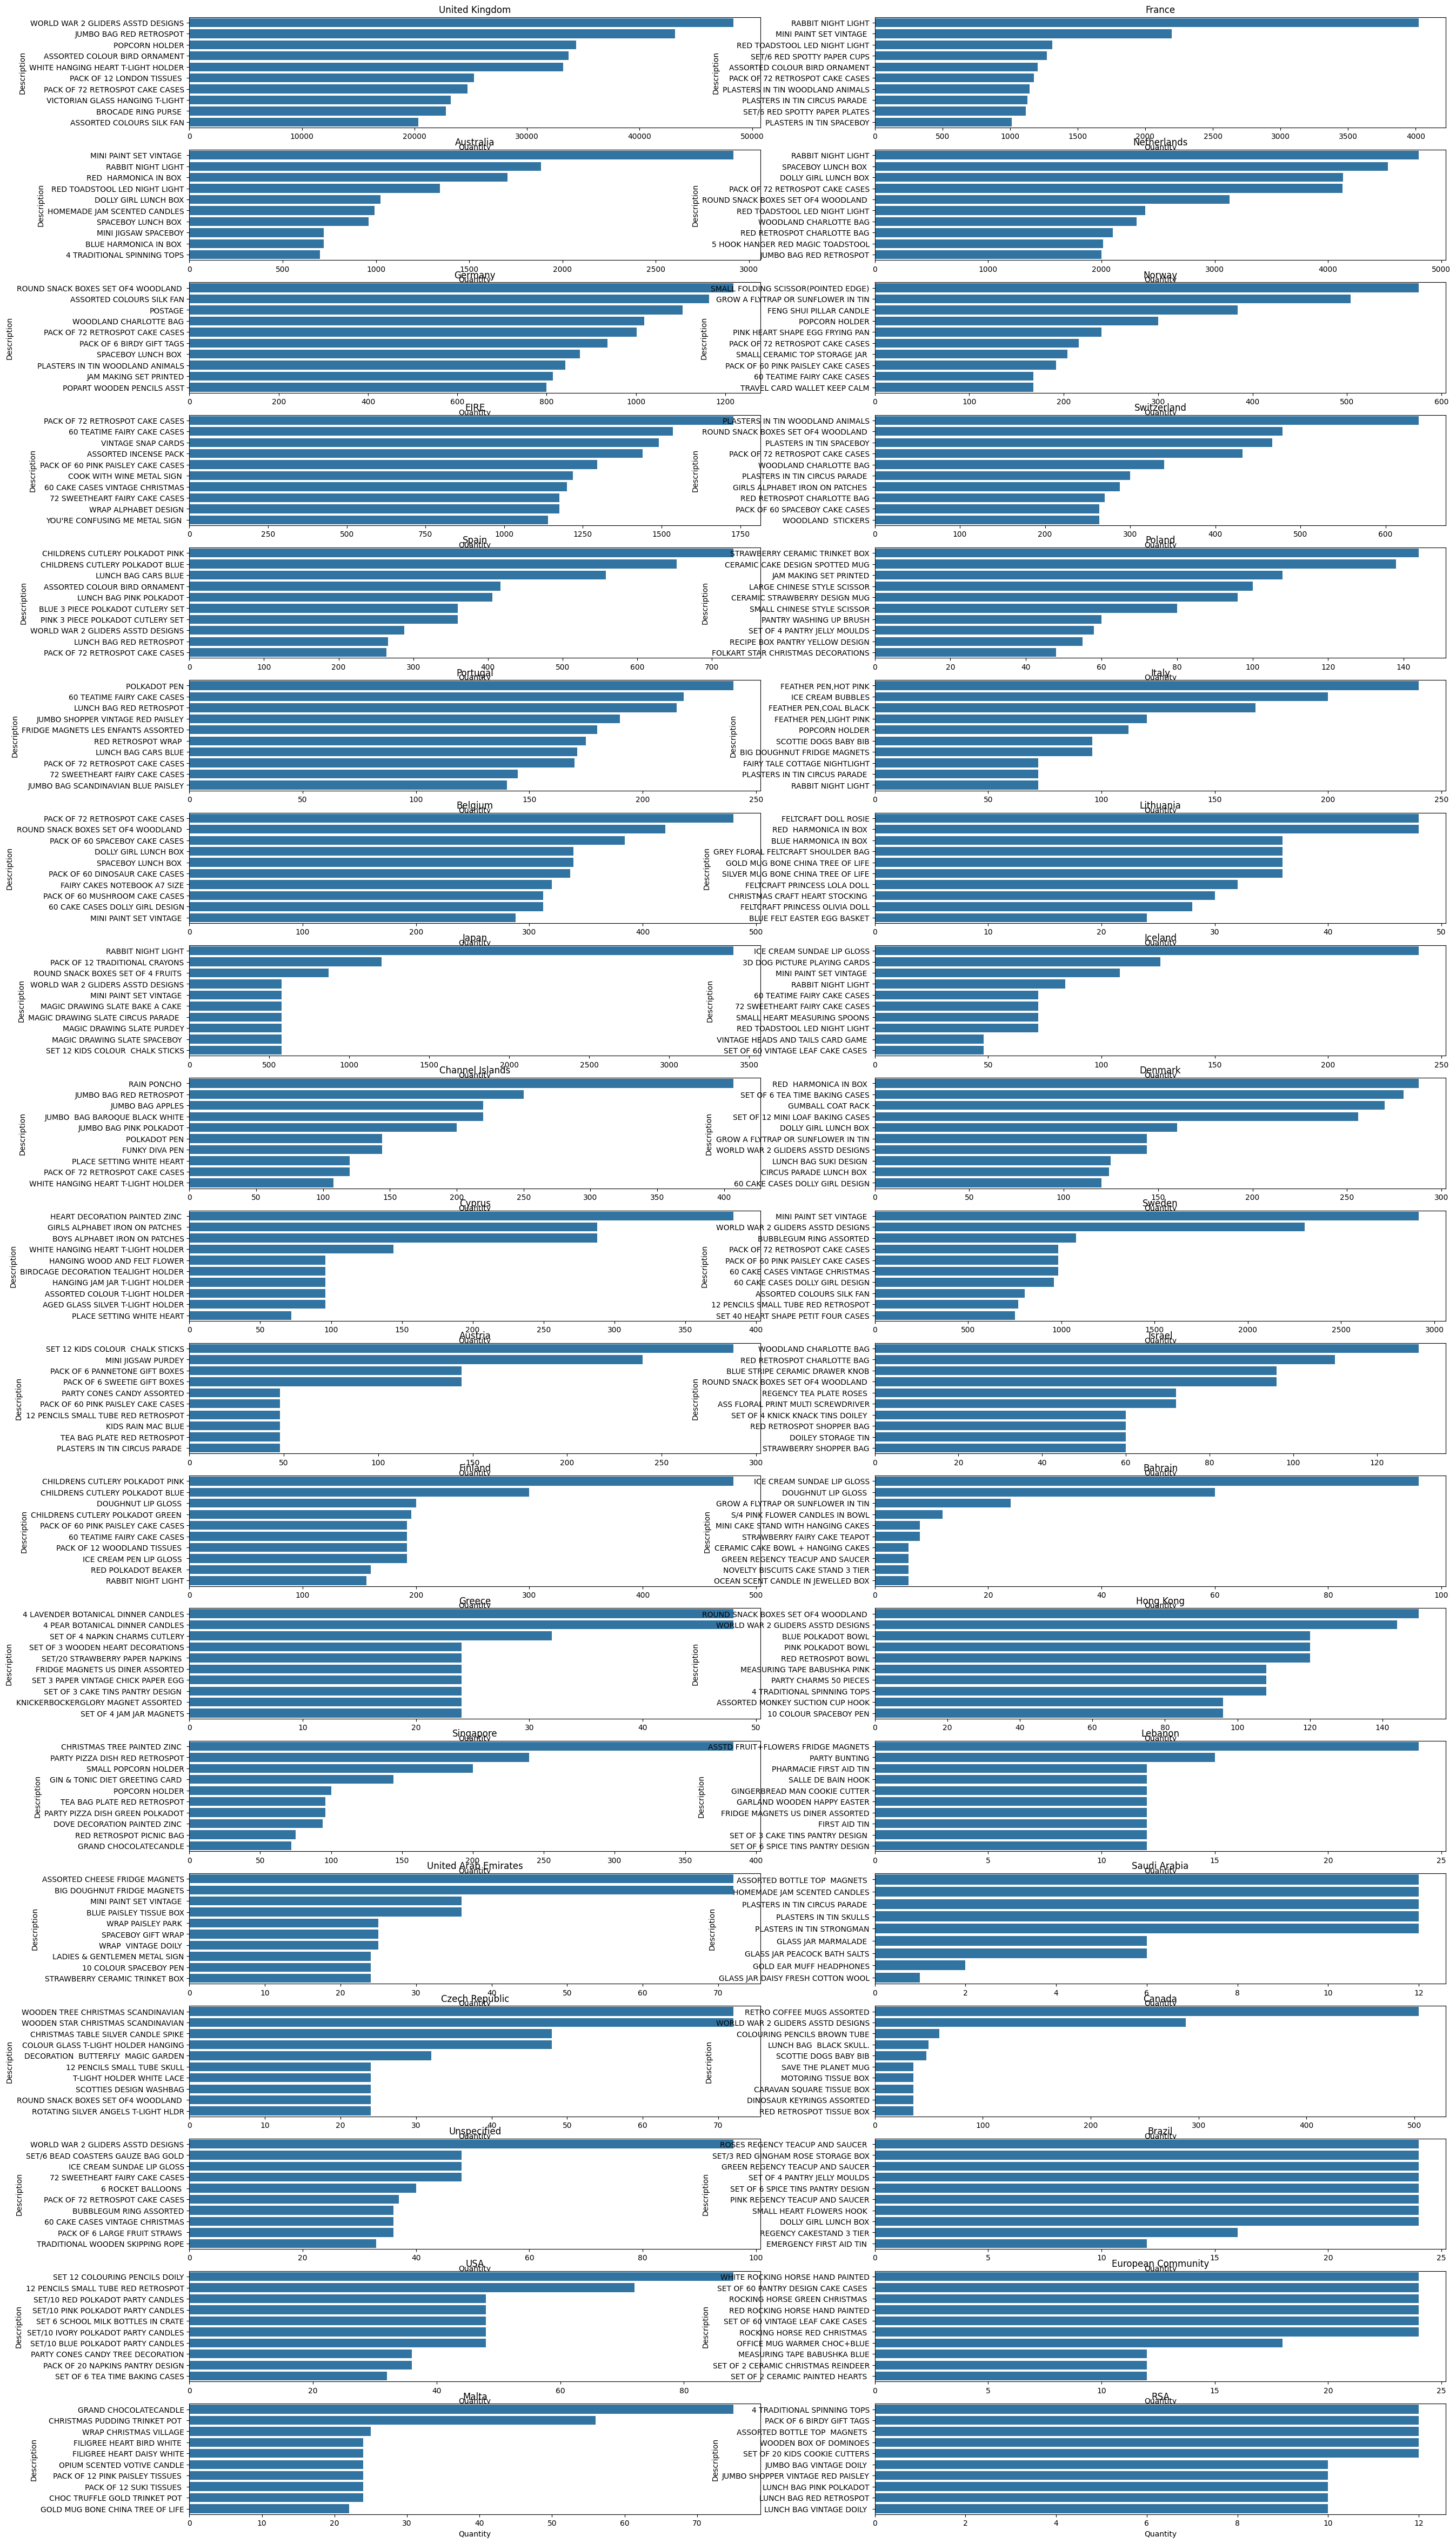

In [ ]:
fig, axes=plt.subplots(nrows=19,ncols=2 ,figsize=(30,60))
Top_Products_Countrywise=pd.DataFrame(columns=['country','Top_Product'])
for i,country in enumerate(countries):
    row=i//2
    col=i%2
    temp_df=top_products_countrywise[top_products_countrywise['Country']==country].sort_values(by='Quantity',ascending=False).head(10)
    Top_Products_Countrywise=pd.concat([Top_Products_Countrywise, pd.DataFrame({'country': [country], 'Top_Product': [temp_df.head(1)['Description'].values[0]]})], ignore_index=True)
    sns.barplot(temp_df,x='Quantity',y='Description',ax=axes[row,col])
    axes[row,col].set_title(country)
    

In [ ]:
Top_Products_Countrywise

,country,Top_Product
0,United Kingdom,WORLD WAR 2 GLIDERS ASSTD DESIGNS
1,France,RABBIT NIGHT LIGHT
2,Australia,MINI PAINT SET VINTAGE
3,Netherlands,RABBIT NIGHT LIGHT
4,Germany,ROUND SNACK BOXES SET OF4 WOODLAND
5,Norway,SMALL FOLDING SCISSOR(POINTED EDGE)
6,EIRE,PACK OF 72 RETROSPOT CAKE CASES
7,Switzerland,PLASTERS IN TIN WOODLAND ANIMALS
8,Spain,CHILDRENS CUTLERY POLKADOT PINK
9,Poland,STRAWBERRY CERAMIC TRINKET BOX


## Top Products Year Wise

In [ ]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df['Invoice_year']=df['InvoiceDate'].dt.year
df['Invoice_month']=df['InvoiceDate'].dt.month
df['Invoice_hour']=df['InvoiceDate'].dt.hour

In [ ]:
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_year,Invoice_month,Invoice_hour
237395,557856,22895,SET OF 2 TEA TOWELS APPLE AND PEARS,6,2011-06-23 11:47:00,3.25,16647.0,United Kingdom,2011,6,11
73521,542354,21756,BATH BUILDING BLOCK WORD,3,2011-01-27 12:19:00,5.95,14709.0,United Kingdom,2011,1,12
428573,573485,23509,MINI PLAYING CARDS FUN FAIR,2,2011-10-31 11:37:00,0.42,15752.0,United Kingdom,2011,10,11
26079,538488,22558,CLOTHES PEGS RETROSPOT PACK 24,4,2010-12-12 12:41:00,1.49,13715.0,United Kingdom,2010,12,12
130917,547520,22326,ROUND SNACK BOXES SET OF4 WOODLAND,6,2011-03-23 14:55:00,2.95,12564.0,France,2011,3,14


In [ ]:
df['Invoice_year'].unique()

array([2010, 2011])

In [ ]:
year_2010_df=df[df['Invoice_year']==2010]
year_2010_df=year_2010_df.groupby(by='Description').agg({'Quantity':'sum'}).reset_index().sort_values(by='Quantity',ascending=False)
year_2010_df

,Description,Quantity
2710,WORLD WAR 2 GLIDERS ASSTD DESIGNS,5195
1677,PACK OF 72 RETROSPOT CAKE CASES,4076
1166,HAND WARMER BABUSHKA DESIGN,3382
2649,WHITE HANGING HEART T-LIGHT HOLDER,3343
2386,SMALL POPCORN HOLDER,2731
...,...,...
2758,damages,-43
2757,check,-55
485,CARD HOLDER GINGHAM HEART,-99
810,Dotcom sales,-200


In [ ]:
year_2011_df=df[df['Invoice_year']==2011]
year_2011_df=year_2011_df.groupby(by='Description').agg({'Quantity':'sum'}).reset_index().sort_values(by='Quantity',ascending=False)
year_2011_df

,Description,Quantity
3906,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48652
1807,JUMBO BAG RED RETROSPOT,45237
2662,POPCORN HOLDER,36334
239,ASSORTED COLOUR BIRD ORNAMENT,34010
3816,WHITE HANGING HEART T-LIGHT HOLDER,31974
...,...,...
1087,Damaged,-7540
2715,Printing smudges/thrown away,-9058
4009,check,-11975
3646,"Unsaleable, destroyed.",-15644


Text(0.5, 1.0, 'YEAR 2011')

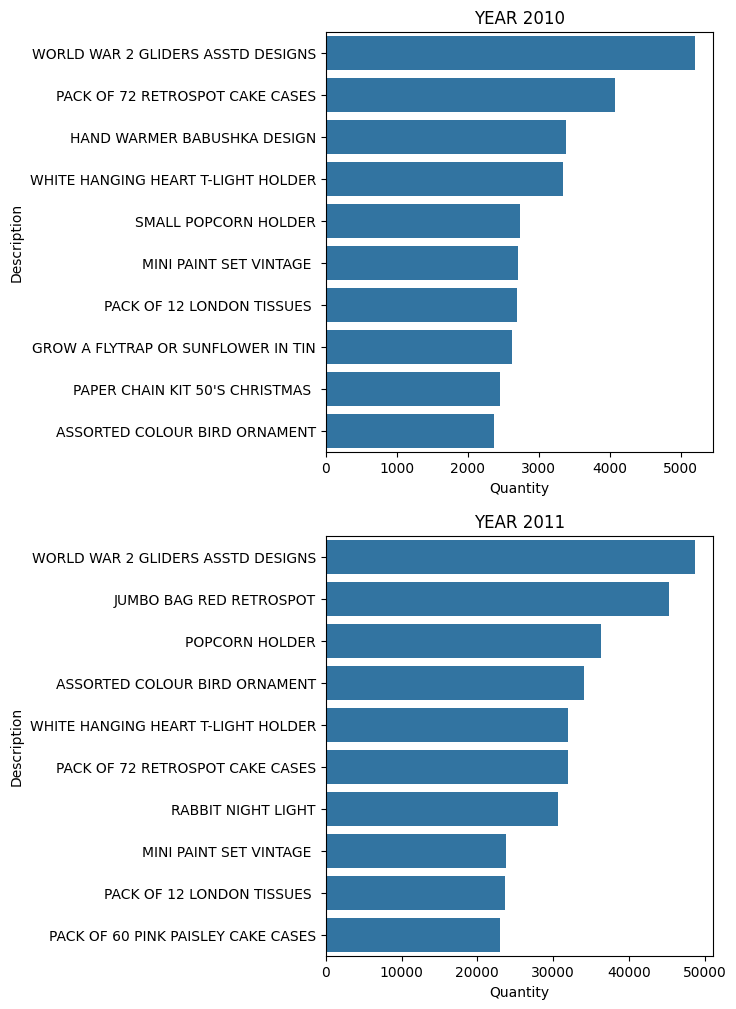

In [ ]:
fig,axes=plt.subplots(nrows=2,ncols=1,figsize=(5,12))
sns.barplot(year_2010_df.head(10),x='Quantity',y='Description',ax=axes[0])
axes[0].set_title('YEAR 2010')
sns.barplot(year_2011_df.head(10),x='Quantity',y='Description',ax=axes[1])
axes[1].set_title('YEAR 2011')


## Top Products Month Wise

In [ ]:
top_products_monthwise=df.groupby(by=['Invoice_month','Description']).agg({'Quantity':'sum'}).reset_index()
top_products_monthwise

,Invoice_month,Description,Quantity
0,1,4 PURPLE FLOCK DINNER CANDLES,2
1,1,OVAL WALL MIRROR DIAMANTE,23
2,1,SET 2 TEA TOWELS I LOVE LONDON,430
3,1,10 COLOUR SPACEBOY PEN,236
4,1,12 COLOURED PARTY BALLOONS,80
...,...,...,...
32449,12,missing,-338
32450,12,mixed up,-424
32451,12,smashed,-235
32452,12,wet,-48


In [ ]:
top_products_monthwise[top_products_monthwise['Invoice_month']==1].sort_values(by='Quantity',ascending=False).head(10)

,Invoice_month,Description,Quantity
2450,1,WHITE HANGING HEART T-LIGHT HOLDER,5530
1532,1,PACK OF 72 RETROSPOT CAKE CASES,3409
789,1,FAIRY CAKE FLANNEL ASSORTED COLOUR,3246
372,1,BROCADE RING PURSE,3181
1100,1,HEART OF WICKER SMALL,2919
1186,1,JUMBO BAG RED RETROSPOT,2639
946,1,GIN + TONIC DIET METAL SIGN,2410
509,1,CHINESE DRAGON PAPER LANTERNS,2128
1380,1,MINI PAINT SET VINTAGE,1913
2195,1,SMALL POPCORN HOLDER,1809


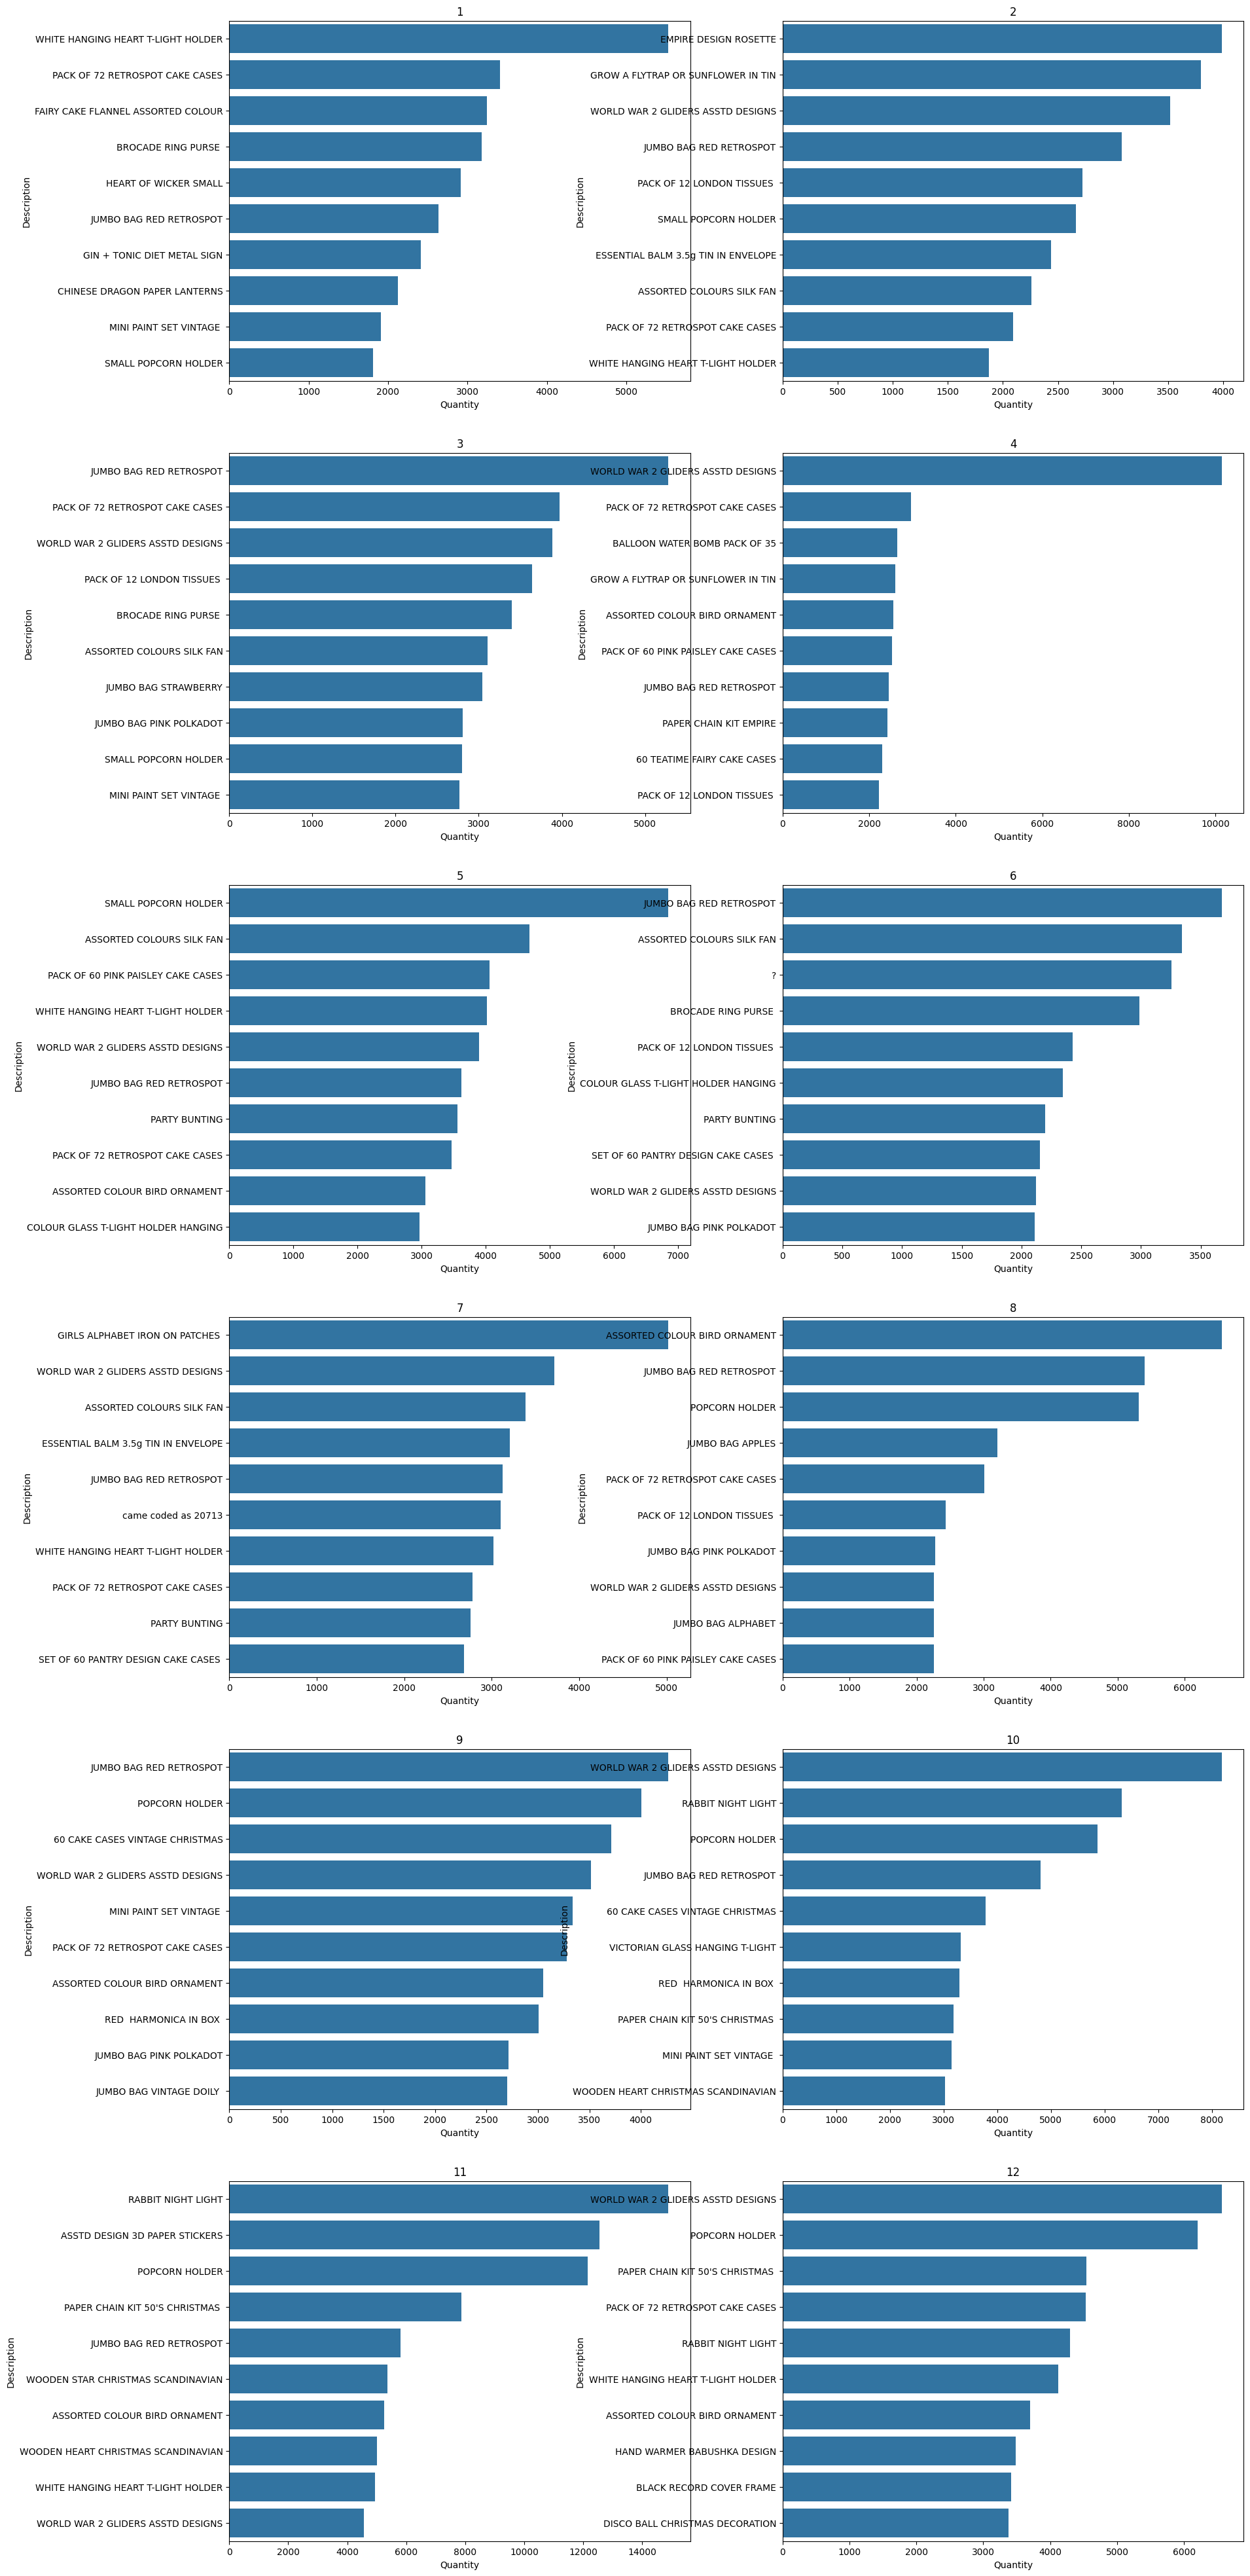

In [ ]:
fig,axes=plt.subplots(nrows=6,ncols=2,figsize=(20,50))
for i in range(0,12):
    row=i//2
    col=i%2
    temp_df=top_products_monthwise[top_products_monthwise['Invoice_month']==i+1].sort_values(by='Quantity',ascending=False).head(10)
    sns.barplot(temp_df,x='Quantity',y='Description',ax=axes[row,col])
    axes[row,col].set_title(i+1)

## Month Wise Sale Analysis

In [ ]:
df.groupby(by=['Invoice_month']).agg({'Quantity':'sum'}).reset_index()

,Invoice_month,Quantity
0,1,308966
1,2,277989
2,3,351872
3,4,289098
4,5,380391
5,6,341623
6,7,391116
7,8,406199
8,9,549817
9,10,570532


In [ ]:
fig=px.line(df.groupby(by=['Invoice_month']).agg({'Quantity':'sum'}).reset_index(),x='Invoice_month',y='Quantity',title='Monthwise sales')
fig.show()

#### Most of the sales were in the month of november 

## Hour Wise Sales 

In [ ]:
df.groupby(by='Invoice_hour').agg({'Quantity':'sum'}).reset_index()
fig=px.bar(df.groupby(by='Invoice_hour').agg({'Quantity':'sum'}).reset_index(),x='Invoice_hour',y='Quantity',title='Hour wise sale')
fig.show()

#### The graph shows that the busiest time is between 10 and 15 (3 PM).

## Most Frequent Customers Analysis

In [ ]:
Most_freq_cust=pd.DataFrame(df['CustomerID'].value_counts().head(10)).reset_index()
Most_freq_cust

,CustomerID,count
0,17841.0,7983
1,14911.0,5903
2,14096.0,5128
3,12748.0,4642
4,14606.0,2782
5,15311.0,2491
6,14646.0,2085
7,13089.0,1857
8,13263.0,1677
9,14298.0,1640


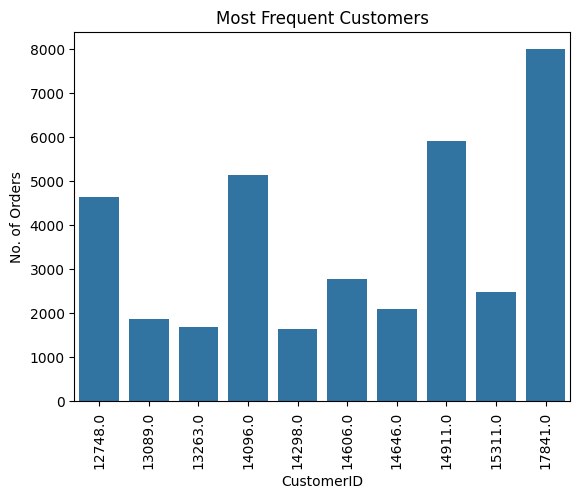

In [ ]:
sns.barplot(Most_freq_cust,x='CustomerID',y='count')
plt.tick_params(axis='x',rotation=90)
plt.title('Most Frequent Customers')
plt.ylabel('No. of Orders')
plt.show()

In [ ]:
df['Total_amount_paid']=df['Quantity']*df['UnitPrice']


In [ ]:
top_customers=df[df['CustomerID'].isin(Most_freq_cust['CustomerID'])][['CustomerID','Country','Description','Quantity','Total_amount_paid']]
top_customers

,CustomerID,Country,Description,Quantity,Total_amount_paid
106,15311.0,United Kingdom,RETROSPOT TEA SET CERAMIC 11 PC,23,97.75
107,15311.0,United Kingdom,GIRLY PINK TOOL SET,5,24.75
108,15311.0,United Kingdom,JUMBO SHOPPER VINTAGE RED PAISLEY,10,19.50
109,15311.0,United Kingdom,"AIRLINE LOUNGE,METAL SIGN",2,4.20
110,15311.0,United Kingdom,WHITE SPOT RED CERAMIC DRAWER KNOB,6,7.50
...,...,...,...,...,...
541855,12748.0,United Kingdom,CINAMMON & ORANGE WREATH,1,6.75
541856,12748.0,United Kingdom,PINK REGENCY TEACUP AND SAUCER,1,2.95
541857,12748.0,United Kingdom,20 DOLLY PEGS RETROSPOT,1,1.45
541858,12748.0,United Kingdom,CHILLI LIGHTS,2,11.50


In [ ]:
top_customers[['CustomerID','Country']].drop_duplicates()

,CustomerID,Country
106,15311.0,United Kingdom
1016,12748.0,United Kingdom
1404,14911.0,EIRE
1441,17841.0,United Kingdom
2421,14606.0,United Kingdom
7440,13089.0,United Kingdom
29815,14298.0,United Kingdom
37952,14646.0,Netherlands
62628,13263.0,United Kingdom
317502,14096.0,United Kingdom


#### Most of the Frequent Customers are from United Kingdom

In [ ]:
customer_Total_payments=df.groupby(by='CustomerID').agg({'Total_amount_paid':'sum'}).reset_index().sort_values(by='Total_amount_paid',ascending=False)
customer_Total_payments

,CustomerID,Total_amount_paid
1703,14646.0,279489.02
4233,18102.0,256438.49
3758,17450.0,187482.17
1895,14911.0,132572.62
55,12415.0,123725.45
...,...,...
125,12503.0,-1126.00
3870,17603.0,-1165.30
1384,14213.0,-1192.20
2236,15369.0,-1592.49


These are the total amount paid by each customers. 

In [ ]:
Top_customer_total_payment=pd.merge(df[df['CustomerID'].isin(customer_Total_payments.head(10)['CustomerID'])][['CustomerID','Country']].drop_duplicates()
,customer_Total_payments.head(10),how='inner').sort_values(by='Total_amount_paid',ascending=False)
Top_customer_total_payment

,CustomerID,Country,Total_amount_paid
8,14646.0,Netherlands,279489.02
6,18102.0,United Kingdom,256438.49
5,17450.0,United Kingdom,187482.17
3,14911.0,EIRE,132572.62
9,12415.0,Australia,123725.45
4,14156.0,EIRE,113384.14
1,17511.0,United Kingdom,88125.38
7,16684.0,United Kingdom,65892.08
2,13694.0,United Kingdom,62653.10
0,15311.0,United Kingdom,59419.34


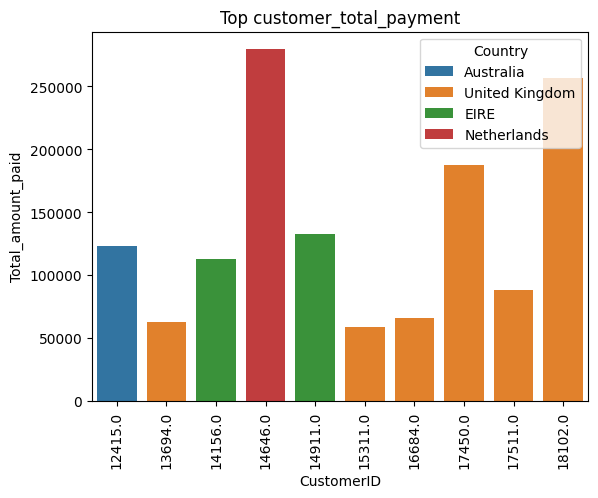

In [ ]:
sns.barplot(Top_customer_total_payment,x='CustomerID',y='Total_amount_paid',hue='Country',dodge=False)
plt.tick_params(axis='x',rotation=90)
plt.title('Top customer_total_payment')
plt.show()

## Number of Customers From each Country

In [ ]:
pd.DataFrame(df['Country'].value_counts()).reset_index()

,Country,count
0,United Kingdom,495478
1,Germany,9495
2,France,8557
3,EIRE,8196
4,Spain,2533
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,2002
8,Portugal,1519
9,Australia,1259


In [ ]:
fig=px.bar(pd.DataFrame(df['Country'].value_counts()).reset_index(),y='Country',x='count')
fig.show()

In our Dataset Most of the Customers are from United kingdom 

## Total amound Paid Per Country

In [ ]:
Total_amount_paid_per_country=df.groupby('Country').agg({'Total_amount_paid':'sum'}).reset_index()
Total_amount_paid_per_country

,Country,Total_amount_paid
0,Australia,137077.270
1,Austria,10154.320
2,Bahrain,548.400
3,Belgium,40910.960
4,Brazil,1143.600
5,Canada,3666.380
6,Channel Islands,20086.290
7,Cyprus,12946.290
8,Czech Republic,707.720
9,Denmark,18768.140


In [ ]:
fig=px.bar(Total_amount_paid_per_country,x='Country',y='Total_amount_paid',title='Total amount paid per country ')
fig.show()

# Data Cleaning

In [12]:
df_clean = df.dropna(subset=['CustomerID'])
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])
df_clean = df_clean[~df_clean['InvoiceNo'].str.contains('C')]

print(f"Data siap: {len(df_clean)} baris transaksi valid.")

Data siap: 397924 baris transaksi valid.


C:\Users\nazwa\AppData\Local\Temp\ipykernel_36204\3678732814.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Sequential Pattern